In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
from datetime import date, timedelta


In [2]:
import clean
import preproc


In [3]:
data1, data2, data3, data4 = clean.get_data()
data = clean.clean_all(data1, data2, data3, data4, clean.get_bairros_data())

In [4]:
data.to_csv("data_cleaned.csv")


In [5]:
preproc_data_n, preproc_data_rate = preproc.get_format(data)

In [8]:
preproc_data_n.to_csv("preproc_data_n.csv")
preproc_data_rate.to_csv("preproc_data_rate.csv")


In [65]:
preproc_data_rate

nb_crimes                                                   \
AR          Anchieta     Bangu Barra da Tijuca  Botafogo Campo Grande   
Date                                                                    
2008-12-31  0.025522  0.009079        0.011007  0.000000     0.010674   
2009-01-01  0.063703  0.047398        0.052289  0.057072     0.066402   
2009-01-02  0.031852  0.015799        0.010458  0.009512     0.045433   
2009-01-03  0.006370  0.040626        0.017430  0.014268     0.027959   
2009-01-04  0.006370  0.029341        0.006972  0.014268     0.033201   
...              ...       ...             ...       ...          ...   
2019-12-28  0.044177  0.034350        0.022698  0.049726     0.019104   
2019-12-29  0.056799  0.015028        0.018571  0.060776     0.010287   
2019-12-30  0.031555  0.030056        0.024761  0.055251     0.011756   
2019-12-31  0.037866  0.015028        0.006190  0.027626     0.007348   
2020-01-01  0.000000  0.000000        0.000000  0.005614     0.000000   

                                                                             \
AR            Centro Cidade de Deus Complexo do Alemao Copacabana Guaratiba   
Date                                                                          
2008-12-31  0.066617       0.000000           0.000000   0.034691  0.050378   
2009-01-01  0.103458       0.198661           0.000000   0.070387  0.083396   
2009-01-02  0.206917       0.000000           0.000000   0.056310  0.015163   
2009-01-03  0.103458       0.198661           0.000000   0.042232  0.037907   
2009-01-04  0.206917       0.099331           0.000000   0.035194  0.015163   
...              ...            ...                ...        ...       ...   
2019-12-28  0.777046       0.000000           0.000000   0.155123  0.011884   
2019-12-29  0.339958       0.062570           0.016988   0.236767  0.003961   
2019-12-30  0.485654       0.031285           0.000000   0.081644  0.011884   
2019-12-31  0.242827       0.000000           0.000000   0.204110  0.007922   
2020-01-01  0.000000       0.000000           0.000000   0.000000  0.000000   

            ...                                                       \
AR          ... Portuaria     Ramos  Realengo Rio Comprido   Rocinha   
Date        ...                                                        
2008-12-31  ...  0.000000  0.006877  0.026449     0.015969  0.000000   
2009-01-01  ...  0.029703  0.062168  0.046459     0.114169  0.014499   
2009-01-02  ...  0.000000  0.034538  0.025811     0.016310  0.000000   
2009-01-03  ...  0.059406  0.041445  0.041297     0.048929  0.014499   
2009-01-04  ...  0.000000  0.034538  0.036135     0.114169  0.000000   
...         ...       ...       ...       ...          ...       ...   
2019-12-28  ...  0.072512  0.036309  0.038813     0.040399  0.000000   
2019-12-29  ...  0.036256  0.029047  0.038813     0.080799  0.000000   
2019-12-30  ...  0.072512  0.021785  0.017250     0.000000  0.011689   
2019-12-31  ...  0.072512  0.029047  0.008625     0.060599  0.000000   
2020-01-01  ...  0.000000  0.000000  0.000000     0.000000  0.000000   

                                                                        
AR         Santa Cruz Santa Teresa Sao Cristovao    Tijuca Vila Isabel  
Date                                                                    
2008-12-31   0.002863     0.057947      0.052674  0.006297    0.000000  
2009-01-01   0.062111     0.000000      0.072225  0.012807    0.053311  
2009-01-02   0.028232     0.192864      0.018056  0.025613    0.038079  
2009-01-03   0.014116     0.096432      0.054169  0.019210    0.015232  
2009-01-04   0.042349     0.000000      0.126394  0.012807    0.007616  
...               ...          ...           ...       ...         ...  
2019-12-28   0.004938     0.067305      0.071630  0.022816    0.057800  
2019-12-29   0.012346     0.067305      0.071630  0.022816    0.028900  
2019-12-30   0.012346     0.033653      0.071630  0.045632    0.03612

In [21]:
districts = [x[1] for x in preproc_data_n.columns]

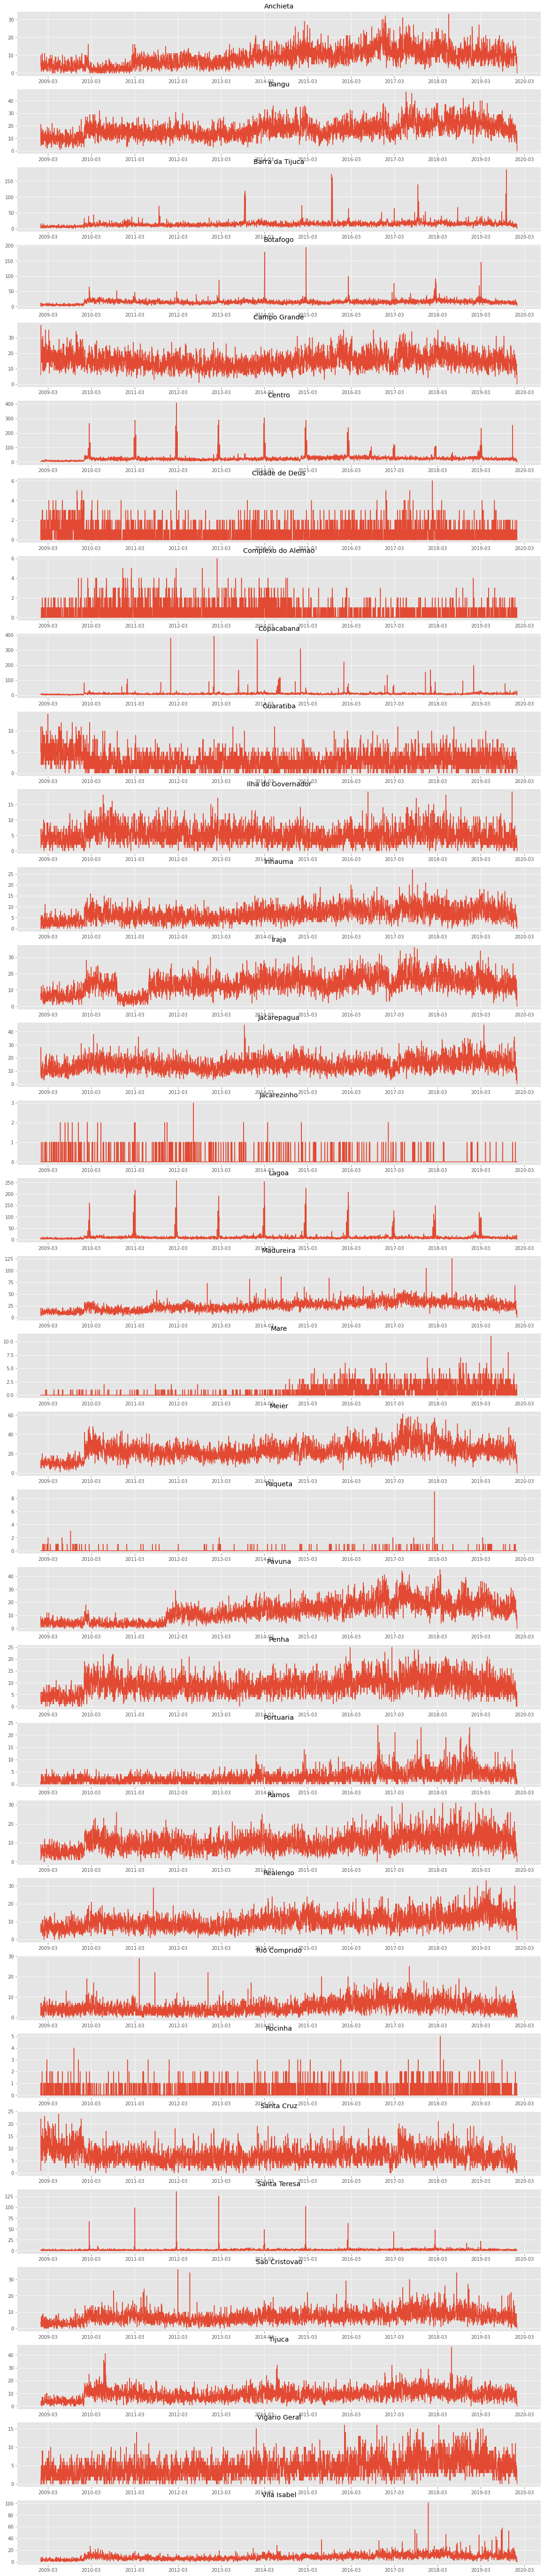

In [23]:
from matplotlib.dates import MonthLocator
fig, axs = plt.subplots(33,1,figsize=(20,100))
for i,j in enumerate (districts):
    timeserie = preproc.extract_ts(preproc_data_n,j)
    axs[i].plot(timeserie.ds, timeserie.y)
    axs[i].set_title(j)
    axs[i].xaxis.set_major_locator(MonthLocator(bymonth=3))
plt.show()

In [32]:
Centro_df = preproc.extract_ts(preproc_data_n,"Centro")

,ds,y
0,2008-12-31,2
1,2009-01-01,3
2,2009-01-02,6
3,2009-01-03,3
4,2009-01-04,6
...,...,...
4014,2019-12-28,16
4015,2019-12-29,7
4016,2019-12-30,10
4017,2019-12-31,5


In [55]:
data_arr = preproc_data_n.to_numpy().T
data_arr.shape

(33, 4019)

In [58]:
data_arr = np.reshape(data_arr,(33,4019,1))
data_arr.shape

(33, 4019, 1)

In [63]:
data

,Crime_ID,Crime_sub_type,Crime_type,Police_station,Place_type,Test_Date_Time,Date_Time,Neighborhood,AR,Date
0,00787401-2009,Lesão corporal dolosa,Não se aplica,043a. Pedra de Guaratiba,Praia,2009-01-01 04:30,2009-01-01 04:30:00,Pedra de Guaratiba,Guaratiba,2009-01-01
1,01137431-2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,Residência,2009-01-01 19:00,2009-01-01 19:00:00,Santissimo,Campo Grande,2009-01-01
2,02023941-2009,Lesão corporal dolosa,Não se aplica,040a. Honório Gurgel,Residência,2008-12-31 20:30,2008-12-31 20:30:00,Honorio Gurgel,Madureira,2008-12-31
4,04751871-2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,Via pública,2009-01-01 01:30,2009-01-01 01:30:00,Campo Grande,Campo Grande,2009-01-01
5,04909311-2009,Ameaça,Não se aplica,039a. Pavuna,Residência,2009-01-01 03:03,2009-01-01 03:03:00,Ricardo de Albuquerque,Anchieta,2009-01-01
...,...,...,...,...,...,...,...,...,...,...
1219363,96730181-2019,Roubo em coletivo,Roubo,027a. Vicente de Carvalho,Interior de coletivo,2019-12-19 20:55,2019-12-19 20:55:00,Iraja,Iraja,2019-12-19
1219364,97578571-2019,Furto a transeunte,Furto,012a. Copacabana,Praia,2019-12-31 17:00,2019-12-31 17:00:00,Copacabana,Copacabana,2019-12-31
1219365,98313421-2019,Furto a transeunte,Furto,012a. Copacabana,Via pública,2019-12-29 19:00,2019-12-29 19:00:00,Copacabana,Copacabana,2019-12-29
1219366,98452031-2019,Furto a transeunte,Furto,014a. Leblon,Interior de coletivo,2019-12-30 11:45,2019-12-30 11:45:00,Centro,Centro,2019-12-30


In [59]:
model = Sequential()
model.add(LSTM(units=10, activation='tanh'))


In [ ]:
# ––– It is very easy to code

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()
model.add(layers.SimpleRNN(units=2, activation='tanh', input_shape=(4,3)))
model.add(layers.Dense(1, activation="linear"))

# The compilation
model.compile(loss='mse', 
              optimizer='rmsprop')  # Recommanded optimizer for RNN
# The fit
model.fit(X, y,
         batch_size=16,
         epochs=10, verbose=0)

# The prediction (one per sequence/city)
model.predict(X)

In [26]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from keras.models import Sequential 

model = Sequential()
model.add(LSTM(units=10, activation='tanh'))


2022-03-02 15:08:05.264375: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
